<div style="background: #1e2761; color: white; padding: 10px; font-size: 18pt; line-height: 1.5">
<b><center>Определение успешности игр для планирования рекламной компании интернет-магазина<b>
    
</div> 

## Оглавление

[Описание задачи](#description)  
[Импорты и настройки](#imports)

[Шаг 1. Изучение общей информации](#start) 
* [1.1 Открытие файла с данными, первый взгляд на данные](#open)
* [1.2 Обработка названий столбцов](#names)
* [1.3 Обзор уникальных значений](#unique)   
* [1.4 Обзор пропущенных значений](#isna)   
[Вывод по шагу 1](#start_conclusion)

[Шаг 2. Предобработка данных](#preprocessing)  
* [2.1 Обработка пропусков](#null)
* [2.2 Приведение типов](#types)
* [2.3 Добавление расчетных данных](#adding_data)  
[Вывод по шагу 2](#preprocessing_conclusion)

[Шаг 3. Исследовательский анализ данных](#analysis)
* [3.1 Динамика выпуска игр по годам](#dynamics)
* [3.2 Анализ продаж по платформам](#sales_platforms)
* [3.3 Определение периода для построения прогноза](#period)
* [3.4 Определение потенциально прибыльных платформ на 2017 г](#platforms)
* [3.5 Характерный разброс продаж игр в разбивке по платформам](#boxplot)
* [3.6 Анализ влияния на продажи отзывов пользователей и критиков в разрезе платформ](#comments)
* [3.7 Анализ прибыльности жанров](#genres)  
[Вывод по шагу 3](#analysis_conclusion)

[Шаг 4. Составление портрета пользователя каждого региона](#regions)
* [4.1 Анализ по региону NA](#NA)
* [4.2 Анализ по региону EU](#EU)
* [4.3 Анализ по региону JP](#JP)   
[Вывод по шагу 4](#regions_conclusion)

[Шаг 5. Проверка гипотез](#tests)
* [5.1 Различия в пользовательских рейтингах платформ Xbox One и PC](#tests_platforms)
* [5.2 Различия в пользовательских рейтингах жанров Action и Sports](#tests_genres)    
[Вывод по шагу 5](#tests_conclusion)

[Общий вывод](#total_conclusion)

------

<a id='description'></a>
## Описание задачи

Интернет-магазин «Стримчик», реализующий компьютерные игры по всему миру, хотел бы спланировать рекламные кампании на будущий годхотел.  

Из открытых источников доступны исторические данные о продажах игр, их жанр, платформа, оценки пользователей и экспертов, возрастной рейтинг компьютерных игр ассоциации ESRB. 

Цель анализа - выявить закономерности, определяющие успешность игр, что позволит сделать ставку на потенциально популярный продукт.

<a id='imports'></a>
### Импорты и настройки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

In [3]:
sns.set(style="ticks")

<a id='start'></a>
## Шаг 1. Изучение общей информации

<a id='open'></a>
### Шаг 1.1 Открытие файла с данными, первый взгляд на данные

In [4]:
df = pd.read_csv('/datasets/games.csv')

In [5]:
def first_look(df):
    display(df.info())
    display(df.head(5))
    display(df.describe())

In [6]:
first_look(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Text(0, 0.5, 'Количество игр, шт.')

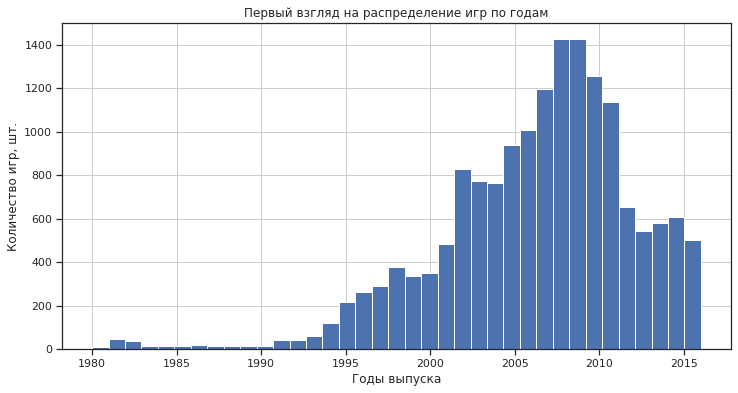

In [7]:
df['Year_of_Release'].hist(bins = int(df['Year_of_Release'].max()) -\
                                   int(df['Year_of_Release'].min()) + 1,\
                                  figsize=(12, 6))
plt.title('Первый взгляд на распределение игр по годам')
plt.xlabel('Годы выпуска')
plt.ylabel('Количество игр, шт.')

Text(0, 0.5, 'Количество игр, шт.')

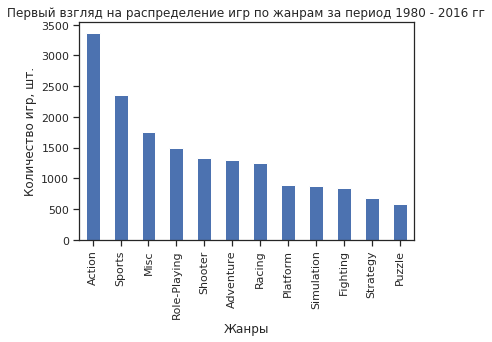

In [8]:
df['Genre'].value_counts().plot(kind='bar')
plt.title('Первый взгляд на распределение игр по жанрам за период 1980 - 2016 гг')
plt.xlabel('Жанры')
plt.ylabel('Количество игр, шт.')

<a id='names'></a>
### Шаг 1.2 Обработка названий столбцов

In [9]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id='unique'></a>
### Шаг 1.3 Обзор уникальных значений

In [10]:
df.duplicated().sum()

0

In [11]:
for col in ['critic_score', 'genre', 'platform', 'user_score', 'rating']:
    display(col, df[col].unique())

'critic_score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Значения оценок критиков выражены целым числом от 0 до 100, но поскольку имеется NAN, тип данных определен как вещественный. Сделаем замену NAN на маркерное значение "-1" и приведем к типу int

В оценках пользователей среди числовых значений присутствуют NAN и значение 'tbd', что является аббревиатурой выражения To Be Determined (будет определено), таким образом, оценка по данным играм проставлена не была, заменим их на NAN, чтобы привести данные столбца к вещественному типу

<a id='isna'></a>
### Шаг 1.4 Обзор пропущенных значений

In [12]:
def review_na(col):
    return df[df[col].isna()].head()

In [13]:
for column in df:
    n = df[column].isna().sum()
    if n > 0:
        display(review_na(column))
        display('{} - количество NAN: {}, доля от всех значений: {:.2%}'.format(column, n, n/len(df)))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


'name - количество NAN: 2, доля от всех значений: 0.01%'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,NaN,NaN


'year_of_release - количество NAN: 269, доля от всех значений: 1.61%'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


'genre - количество NAN: 2, доля от всех значений: 0.01%'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,nan,NaN,NaN


'critic_score - количество NAN: 8578, доля от всех значений: 51.32%'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,nan,NaN,NaN


'user_score - количество NAN: 6701, доля от всех значений: 40.09%'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,nan,NaN,NaN


'rating - количество NAN: 6766, доля от всех значений: 40.48%'

Без названия и жанра одни и те же 2 игры, при этом год выпуска у них очень старый - релиз 1993, для построения прогноза на 2017г эти данные не будут полезными

Год - попробуем восстановить часть данных после дополнительного анализа названия игр (варианты - указание года в названии игры, релиз игр с одинаковым названием на разных платформах). Те годы, восстановить которые не удастся, заменим на маркер, чтобы иметь возможность привести данные к целочисленному типу, и иметь возможность отсеивать эти данные в дальнейшем. Любые другие варианты замены рассматривать не будем, т.к. информация носит уникальный характер и невозможно достоверно предположить возможные зависимости даты релиза от представленной информации.

В оценках юзеров, критиков и возрастном рейтинге большое количество пропусков, порядка 40-50% всей совокупности. Посмотрим более подробно на пропуски, чтобы попытаться понять природу их возникновения.

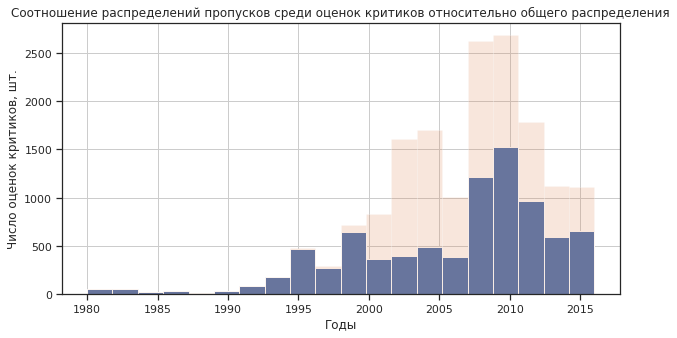

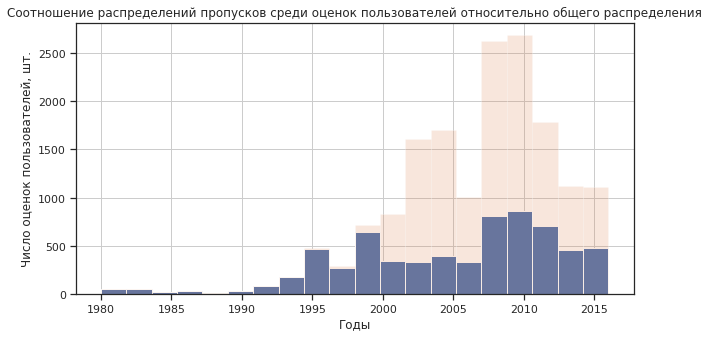

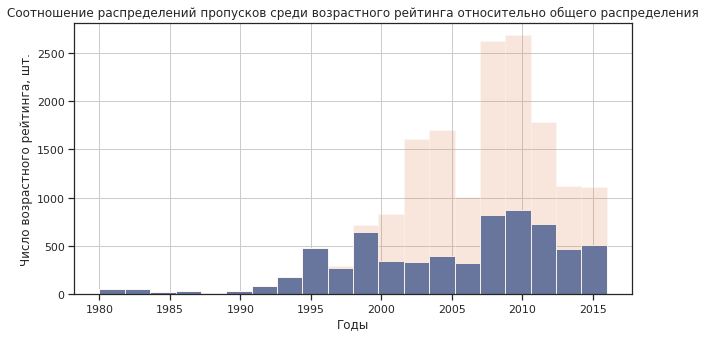

In [14]:
titles = {'critic_score' : 'оценок критиков', 'user_score' : 'оценок пользователей', 'rating': 'возрастного рейтинга'}
for col in ['critic_score', 'user_score', 'rating']:
    df[df[col].isna()]['year_of_release'].hist(bins=20)
    df['year_of_release'].hist(alpha=0.2, bins=20, figsize=(10, 5))
    plt.title('Соотношение распределений пропусков среди {} относительно общего распределения'.format(titles.get(col)))
    plt.xlabel('Годы')
    plt.ylabel('Число {}, шт.'.format(titles.get(col)))
    plt.show()

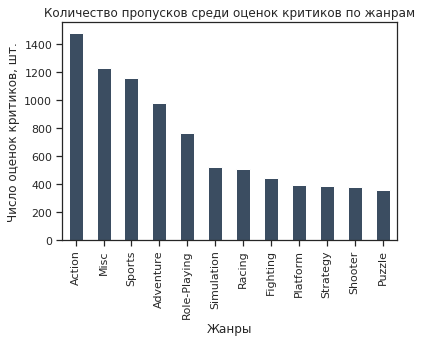

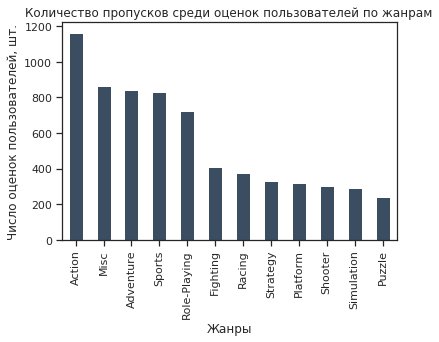

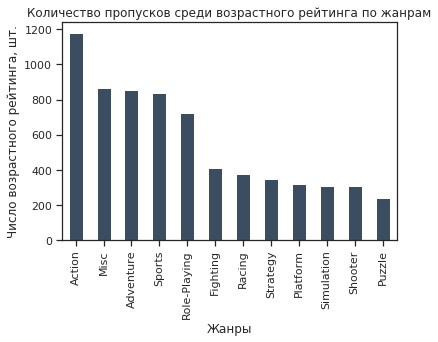

In [15]:
for col in ['critic_score', 'user_score', 'rating']:
    display(df[df[col].isna()]['genre'].value_counts().plot(kind='bar', color='#3b4d61'))
    plt.title('Количество пропусков среди {} по жанрам'.format(titles.get(col)))
    plt.xlabel('Жанры')
    plt.ylabel('Число {}, шт.'.format(titles.get(col)))
    plt.show()

Пропущенные значения оценок юзеров, критиков и возрастного рейтинга распределены довольно равномерно относительно количества выпущенных игр по годам и жанрам 

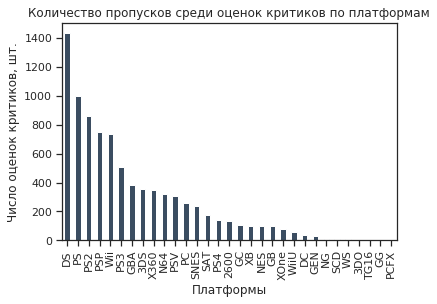

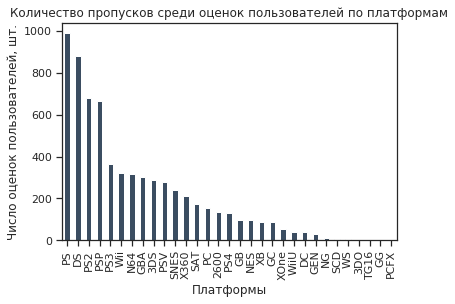

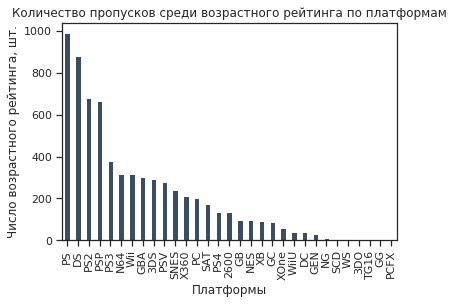

In [16]:
for col in ['critic_score', 'user_score', 'rating']:
    display(df[df[col].isna()]['platform'].value_counts().plot(kind='bar', color='#3b4d61'))
    plt.title('Количество пропусков среди {} по платформам'.format(titles.get(col)))
    plt.xlabel('Платформы')
    plt.ylabel('Число {}, шт.'.format(titles.get(col)))
    plt.show()

In [17]:
res = pd.DataFrame(columns=['indicator', 'value'])
i = 0
for col in ['critic_score', 'user_score', 'rating']:
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        res.loc[i] = [str(col) + '_' + str(region), df[df[col].isna()][region].sum() / df[region].sum()]
        i += 1

In [18]:
res

,indicator,value
0,critic_score_na_sales,0.35
1,critic_score_eu_sales,0.30
2,critic_score_jp_sales,0.65
3,user_score_na_sales,0.28
4,user_score_eu_sales,0.25
5,user_score_jp_sales,0.65
6,rating_na_sales,0.28
7,rating_eu_sales,0.25
8,rating_jp_sales,0.65


В основном нет отзывов и рейтингов по "японским" платформам (Nintendo DS, Wii, PlayStation) и по продажам, осуществленным в Японии.

По рейтингу можно попытаться восстановить данные по названиям игр, выпускаемых на разных платформах. Оставшиеся NAN'ы обозначим маркером `undefined`.

<a id='start_conclusion'></a>
## Вывод по шагу 1

Полученный датасет содержит 16715 строк записей, включает в себя данные об играх, продаваемых в 4 регионах (NA, EU, JP и Other) в период с 1980 г по 2016 г (за последний год, вероятнее всего, данные не полные). Для игр определены характеристики: название, год выпуска, платформа и жанр, а также рейтинги пользоваелей и критиков, возрастной рейтинг.

Среди данных обнаружены пропуски, на этапе предобработки необходимо сделать следующие действия:
* `critic_score` - сделать замену NAN на маркерное значение "-1" и привести к типу int;
* `user_score` - значение 'tbd'заменить на NAN, привести сотлбец к вещественному типу;
* `name` и `genre` - одни и те же 2 игры с релизом от 1993г, в прогнозный период эти данные не будут включены, оставим как есть;
* `year_of_release` - восстановить часть данных на основании названий игр, остальные заменить на маркер, приведем столбец к целочисленному типу;
* `rating` - восстановить часть данных на основании названий игр, остальные NAN заменить на маркер undefined

Для возможности проведения анализа в целом по рынку, добавим столбец по суммарным продажам всех регионов.

Стоит также отметить найденную особенность - отзывы критиков и пользователей, а также возрастные рейтинги отсутствуют в основном по "японским" платформам (семейства Nintendo DS, Wii и PlayStation) и по продажам, осуществленным в Японии (доля таких продаж с отсутствующими оценками и рейтингом порядка 65% всех продаж на японском рынке). Вероятно, это может быть связано с особенностями региона, довольно сильной обособленностью и независимостью от американских стандартов, специфичностью вкусов и наличием собственных возрастных рейтингов и организаций, их проставляющих.

<a id='preprocessing'></a>
## Шаг 2. Предобработка данных

<a id='null'></a>
### Шаг 2.1 Обработка пропусков

Попробуем восстановить даты релизов на основе названия игр

In [19]:
df_name_wo_na = df[df['name'].notna()]

In [20]:
# сделаем справочник по наименованию игр с годом релиза
dict_year = df_name_wo_na[df_name_wo_na['year_of_release'].notna()][['name', 'year_of_release']].drop_duplicates()

In [21]:
# справочник с годом выхода платформы
dict_born_pl = df.groupby('platform')['year_of_release'].min().reset_index()

In [22]:
# объединяем со справочником выхода платформ, создаем стобец с годом выхода платформы
df = df.merge(dict_born_pl, left_on='platform', right_on='platform', how='left')
df = df.rename(columns={"year_of_release_x": "year_of_release", "year_of_release_y": "year_born"})

In [23]:
# объединяем df со справочником годов релиза в зависимости от названия
df = df.merge(dict_year, left_on='name', right_on='name', how='left')

In [24]:
# Проверим, нет ли логической ошибки, когда год релиза игры раньше года выхода платформы
df.loc[(df['year_of_release_x'].isna()) & (df['year_born'] > df['year_of_release_y']), 'year_of_release_y'] = float('nan')

In [25]:
df['year_of_release_x'] = df['year_of_release_x'].fillna(df['year_of_release_y'])
df.drop(columns=['year_born', 'year_of_release_y'], inplace=True)
df = df.rename(columns={"year_of_release_x": "year_of_release"})
len(df[df['year_of_release'].isna()])

153

Удалось воcстановить 116 значений из 269 пропущенных, оставшиеся заменим на -1

In [26]:
df['year_of_release'] = df['year_of_release'].fillna(-1)
df['year_of_release'].isna().sum()

0

Не проставленные оценки пользователей заменим на NAN

In [27]:
df['user_score'] = df['user_score'].fillna(float('nan'))
df['user_score'] = df['user_score'].replace('tbd', float('nan'))

In [28]:
len(df[df['user_score']=='tbd'])

0

Пропущенные значения оценок критиков заменим на -1

In [29]:
df['critic_score'] = df['critic_score'].fillna(-1)

Восстановим данные рейтинга на основе названий игр, выпускаемых на разных платформах, следуя логике, что единый контент игры предполагает одинаковый возрастной рейтинг и не зависит от конкретной платформы, где была выпущена игра. 

In [30]:
# сделаем справочник по наименованию игр с возрастным рейтингом
dict_rating = df[df['rating'].notna()][['name', 'rating']].drop_duplicates()

In [31]:
df['rating'].isna().sum()

7668

In [32]:
df = df.merge(dict_rating, left_on='name', right_on='name', how='left')
df['rating'] = df['rating_x'].fillna(df['rating_y'])
df.drop(columns=['rating_x', 'rating_y'], inplace=True)
df['rating'].isna().sum()

6898

Удалось восстановить 770 пропущенных значений, оставшиеся значения NAN заменим на 'undefined'

In [33]:
df['rating'] = df['rating'].fillna('undef')
df['rating'].isna().sum()

0

<a id='types'></a>
### Шаг 2.2 Приведение типов

In [34]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'].astype(int), downcast='signed')

In [35]:
df['user_score'] = df['user_score'].astype(float)

In [36]:
df['critic_score'] = pd.to_numeric(df['critic_score'], downcast='signed')

In [37]:
for col in df.select_dtypes(include=['float']):
    df[col] = pd.to_numeric(df[col], downcast='float')

In [38]:
df.dtypes

name                object
platform            object
year_of_release      int16
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score          int8
user_score         float32
rating              object
dtype: object

<a id='adding_data'></a>
### Шаг 2.3 Добавление расчетных данных

In [39]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
round(df['total_sales'].sum(), 2)

11547.74

Text(0, 0.5, 'Продажи, млн.копий')

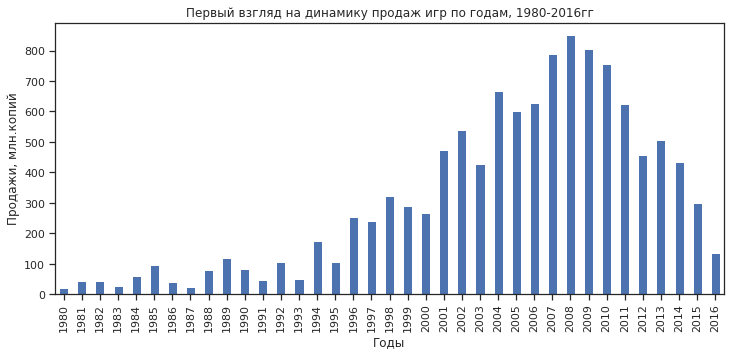

In [40]:
plt.figure(figsize=(12,5))
df[df['year_of_release'] > 0].groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Первый взгляд на динамику продаж игр по годам, 1980-2016гг')
plt.xlabel('Годы')
plt.ylabel('Продажи, млн.копий')

<a id='preprocessing_conclusion'></a>
## Вывод по шагу 2

Часть данных по году релиза и возрастному рейтингу удалось восстановить на основе названий игр, выпускаемых для разных платформ. 

Оставшиеся значения NAN были заменены и приведены к необходимому типу, как было указано на первом шаге. 

Также был добавлен расчетный столбец `total_sales`, аккумулирующий продажи игры во всех регионах.

<a id='analysis'></a>
## Шаг 3. Исследовательский анализ данных

<a id='dynamics'></a>
### Шаг 3.1 Динамика выпуска игр по годам

Text(0, 0.5, 'Количество игр, шт.')

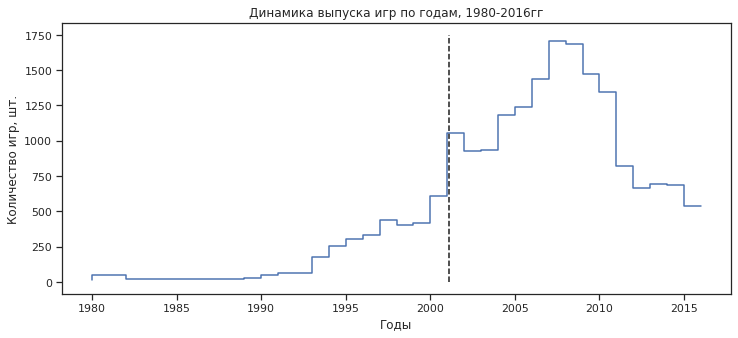

In [41]:
data = df[df['year_of_release'] > 0].groupby('year_of_release')['name'].count().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=data, x='year_of_release', ci=None, y='name', drawstyle='steps')
plt.vlines(2001.1, 0, 1750, linestyles='dashed')
plt.title('Динамика выпуска игр по годам, 1980-2016гг')
plt.xlabel('Годы')
plt.ylabel('Количество игр, шт.')

До 2002 года было мало игр и этот период совсем давнишний, чтобы опираться на тенденции, которые были в этот период, и как-то их учитывать в прогнозе на 2017г.   
Начиная с 2008 г количество игр ежегодно начало уменьшаться, значительный спад видим в 2011 году, после которого текущий уровень игр составляет в среднем 700 в год. Вероятнее всего, это связано со все более широким распространением мобильных игр.

<a id='sales_platforms'></a>
### Шаг 3.2 Анализ продаж по платформам

Посмотрим, в какие годы продавались игры по каким платформам

Text(0, 0.5, 'Платформы')

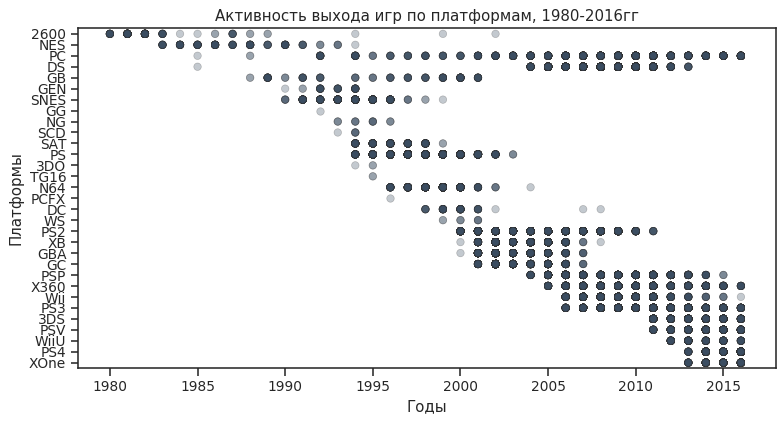

In [42]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 90)
sns.stripplot(data=df[(df['year_of_release'] > 0)]
              .sort_values('year_of_release'), y='platform', x='year_of_release', jitter=False,  
              alpha=.3, color='#3b4d61', size=6, linewidth=.5, edgecolor='gray')
plt.title('Активность выхода игр по платформам, 1980-2016гг')
plt.xlabel('Годы')
plt.ylabel('Платформы')

Некорректные данные - продажи игр для приставок ранее даты выхода самой консоли (DS). При расчете средней продолжительности жизни платформы наличие такой ошибки будет искажать и приводить к увеличению расчетного среднего значения. Сделаем замену даты релиза на "-1". т.к. точной даты выхода игры мы не знаем.

In [43]:
df[(df['platform'] == 'DS') & (df['year_of_release'] > 0)].sort_values('year_of_release').head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
19081,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,-1,nan,undef,0.02


In [44]:
df.loc[df['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = -1

In [45]:
period_of_life = df[df['year_of_release'] > 0].groupby('platform').agg({'year_of_release' : ('min', 'max')}).reset_index()
period_of_life = period_of_life.set_axis(['platform', 'min', 'max'], axis=1, inplace=False)
period_of_life['duration'] = period_of_life['max'] - period_of_life['min']
print('Средний период жизни по всем платформам: {} лет'.format(round(period_of_life['duration'].mean())))

Средний период жизни по всем платформам: 7 лет


Выберем топ-5 самых успешных по продажам платформ и посмотрим, как менялись продажи за их срок жизни

In [46]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().reset_index()
top_platforms

,platform,total_sales
0,PS2,1758.53
1,X360,1283.37
2,PS3,1260.40
3,Wii,1055.91
4,DS,932.34


Text(0, 0.5, 'Продажи, млн.копий')

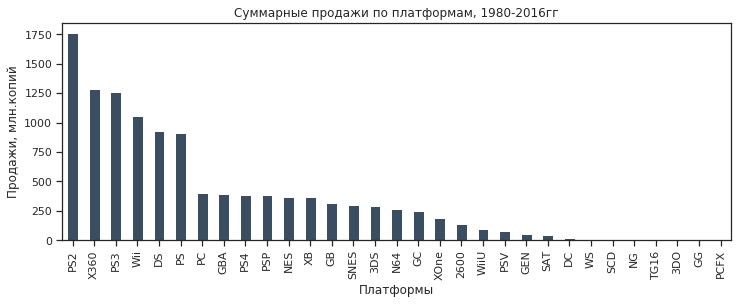

In [47]:
(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
 .plot(kind='bar', figsize=(12,4), color='#3b4d61'))
plt.title('Суммарные продажи по платформам, 1980-2016гг')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн.копий')

Text(0, 0.5, 'Продажи, млн.копий')

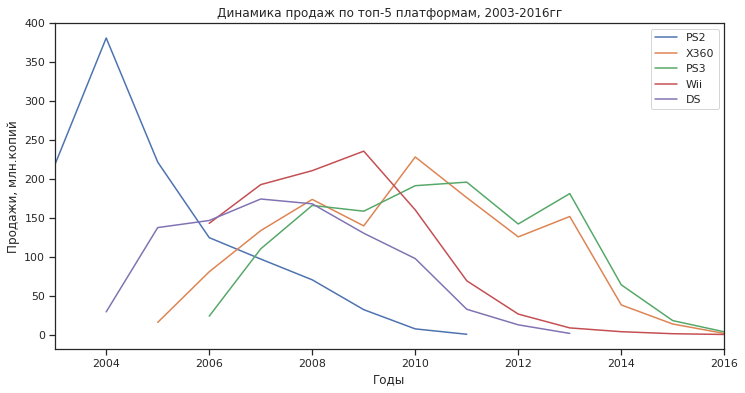

In [48]:
for pl in top_platforms['platform']:
    df[(df['year_of_release'] > 2002) & (df['platform'] == pl)].groupby('year_of_release')['total_sales'].sum().plot(label=pl, figsize=(12,6))
plt.legend()
plt.title('Динамика продаж по топ-5 платформам, 2003-2016гг')
plt.xlabel('Годы')
plt.ylabel('Продажи, млн.копий')

In [49]:
period_of_life.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")')[['platform', 'duration']]

,platform,duration
4,DS,9
16,PS2,11
17,PS3,10
26,Wii,10
28,X360,11


In [50]:
print('Средний период жизни по топ-5 платформам: {} лет'.
      format(round(period_of_life.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")')['duration'].mean())))

Средний период жизни по топ-5 платформам: 10 лет


В среднем длина жизни платформы составляет 10 лет, пик продаж в среднем приходится на 5 год существования

<a id='period'></a>
### Шаг 3.3 Определение периода для построения прогноза

Исходя из того, что пик продаж у платформ приходится в среднем на 5-ый год продаж, наиболее интересным выглядит четырехлетний исторический период для построения прогноза, который предполагает, что потенциально прибыльные платформы уже успели появиться в этом историческом периоде и набирают популярность, поэтому продажи в пятый год либо превысят значения предыдущих лет и достигнут пика, либо если пик уже прошел, то будут постепенно снижаться, но все равно дадут ощутимый результат, выше, чем продажи игр любых других платформ.

In [51]:
df_actual = df[df['year_of_release'] > 2012]

In [52]:
first_look(df_actual)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 18 to 19910
Data columns (total 12 columns):
name               2581 non-null object
platform           2581 non-null object
year_of_release    2581 non-null int16
genre              2581 non-null object
na_sales           2581 non-null float32
eu_sales           2581 non-null float32
jp_sales           2581 non-null float32
other_sales        2581 non-null float32
critic_score       2581 non-null int8
user_score         1341 non-null float32
rating             2581 non-null object
total_sales        2581 non-null float32
dtypes: float32(6), int16(1), int8(1), object(4)
memory usage: 168.9+ KB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
18,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
19,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
20,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
34,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
35,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2581.00,2581.00,2581.00,2581.00,2581.00,2581.00,1341.00,2581.00
mean,2014.43,0.22,0.19,0.06,0.06,30.84,6.66,0.53
std,1.08,0.65,0.60,0.22,0.21,37.43,1.58,1.46
min,2013.00,0.00,0.00,0.00,0.00,-1.00,0.20,0.01
25%,2013.00,0.00,0.00,0.00,0.00,-1.00,5.90,0.04
50%,2014.00,0.03,0.03,0.01,0.01,-1.00,7.00,0.12
75%,2015.00,0.16,0.14,0.05,0.04,72.00,7.80,0.42
max,2016.00,9.66,9.09,4.35,3.96,97.00,9.30,21.05


<a id='platforms'></a>
### Шаг 3.4 Определение потенциально прибыльных платформ на 2017 г

In [53]:
(df[df['year_of_release'] > 2012].
     pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').T
)

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,60.63,45.09,29.40,15.85
DS,1.54,nan,nan,nan
PC,14.15,16.11,11.04,5.44
PS3,181.22,63.96,17.97,3.60
PS4,25.99,150.97,134.32,72.64
PSP,3.49,0.29,0.12,nan
PSV,13.14,18.65,6.78,4.29
Wii,8.62,3.75,1.14,0.18
WiiU,26.81,23.97,16.60,6.04


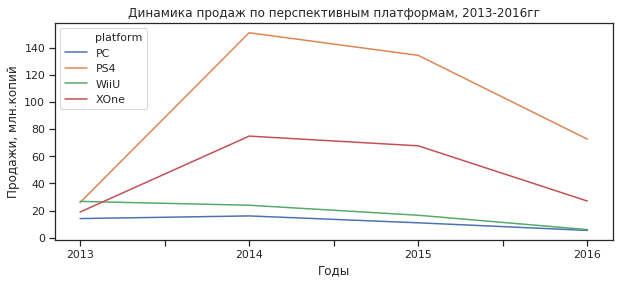

In [54]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=(df_actual
                   .query('platform in ("XOne", "PS4", "PC", "WiiU")')
                   .pivot_table(index=['year_of_release','platform'],\
                    values='total_sales', aggfunc=sum).reset_index()),\
                    x='year_of_release', y='total_sales', hue='platform')
plt.legend()
ax.set_xticklabels(['', '2013', '', '2014', '', '2015', '', '2016'])
plt.title('Динамика продаж по перспективным платформам, 2013-2016гг')
plt.xlabel('Годы')
plt.ylabel('Продажи, млн.копий')
np.warnings.filterwarnings('ignore')

Учитывая, что за 2016 г могут быть представлены не все данные, то восходящая динамика намечается у относительно свежих платформ **XOne** и **PS4**. Учитывая, что Xbox и Sony являются крупнейшими игроками рынка, можно считать эти платформы наиболее потенциально прибыльными

**PC** тоже может быть интересной платформой с точки зрения своей стабильности.

Платформа **WiiU** также может быть довольно перспективным вариантом в силу своей новизны и опираясь на опыт запуска первых платформ данной серии, что мы видели на графике топ-5 успешных платформ.

<a id='boxplot'></a>
### Шаг 3.5 Характерный разброс продаж игр в разбивке по платформам

Возьмем выбранные платформы (XOne, PS4, PC, WiiU) на рассматриваемом историческом периоде (после 2012 г)

In [55]:
df_platform = df_actual.query('platform in ("XOne", "PS4", "PC", "WiiU")')

In [56]:
first_look(df_platform)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 45 to 19887
Data columns (total 12 columns):
name               1118 non-null object
platform           1118 non-null object
year_of_release    1118 non-null int16
genre              1118 non-null object
na_sales           1118 non-null float32
eu_sales           1118 non-null float32
jp_sales           1118 non-null float32
other_sales        1118 non-null float32
critic_score       1118 non-null int8
user_score         744 non-null float32
rating             1118 non-null object
total_sales        1118 non-null float32
dtypes: float32(6), int16(1), int8(1), object(4)
memory usage: 73.2+ KB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
45,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,nan,undef,14.63
59,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
60,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
61,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
104,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,744.00,1118.00
mean,2014.82,0.26,0.26,0.03,0.08,45.67,6.67,0.62
std,1.01,0.55,0.61,0.09,0.19,37.40,1.49,1.31
min,2013.00,0.00,0.00,0.00,0.00,-1.00,1.40,0.01
25%,2014.00,0.01,0.02,0.00,0.00,-1.00,5.90,0.05
50%,2015.00,0.06,0.07,0.00,0.02,65.00,7.00,0.17
75%,2016.00,0.25,0.23,0.02,0.06,78.00,7.80,0.60
max,2016.00,6.03,6.31,1.46,2.38,97.00,9.30,14.63


Text(0, 0.5, 'Продажи, млн.копий')

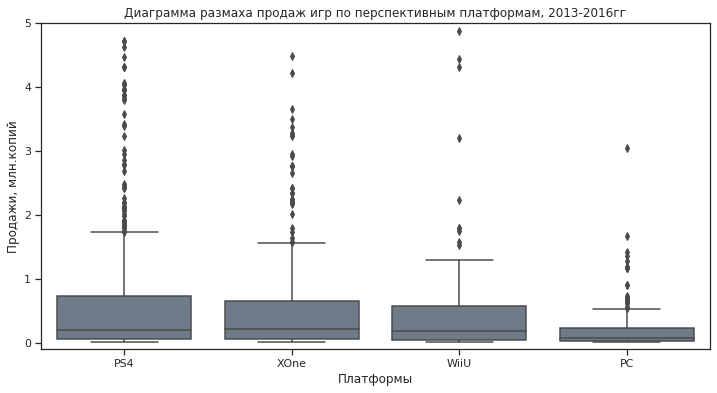

In [57]:
plt.figure(figsize=(12,6))
plt.ylim(-0.1, 5)
sns.boxplot(data=df_platform, x='platform', y='total_sales', color='#6b7b8c')
plt.title('Диаграмма размаха продаж игр по перспективным платформам, 2013-2016гг')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн.копий')

In [58]:
def count_mean(platform):
    return round((df_platform[df_platform['platform'] == platform])['total_sales'].mean(), 2)

In [59]:
def count_median(platform):
    return round((df_platform[df_platform['platform'] == platform])['total_sales'].median(), 2)

In [60]:
def count_var(platform):
    return round(np.var(df_platform[df_platform['platform'] == platform])['total_sales'], 2)

In [61]:
def count_std(platform):
    return round(np.std(df_platform[df_platform['platform'] == platform], ddof=1)['total_sales'], 2)

In [62]:
res = pd.DataFrame(columns=['platform', 'mean', 'median', 'var', 'std'])
i = 0
for pl in df_platform['platform'].unique():
    res.loc[i] = [pl, count_mean(pl), count_median(pl), count_var(pl), count_std(pl)]
    i += 1

In [63]:
res

,platform,mean,median,var,std
0,PS4,0.82,0.20,2.93,1.71
1,XOne,0.64,0.21,1.13,1.07
2,WiiU,0.51,0.19,0.90,0.95
3,PC,0.22,0.08,0.13,0.36


Среди выбранных платформ у всех приставок медианное значение продаж почти идентично - около 0.2 млн.копий, у PC же этот показатель в 2 раза ниже (0.08 млн.копий). А вот средние значения продаж по платформам довольно сильно различаются, у каждой следующей патформы на 2 и 3 местах средний показатель на 25-28% ниже предыдущего. Максимальное же среднее (у PS4 на уровне 0.82 млн.копий) почти в 4 раза превосходит минимальное (у PC на уровне 0.22 млн.копий). По каждой платформе показатель продаж имеет тяжелый хвост справа, что на графике ящиков с усами можно видеть как выбросы. При этом платформы с наибольшими средними суммами имеют и наибольший разброс значений, то есть ведут себя менее предсказуемо в плане продаж, а такая платформа как PC хоть и имеет сравнительно небольшие средние и медианные показатели продаж, зато отличается большей стабильностью и меньшей волатильностью, и, значит, ведет себя более предсказуемо при продвижении.

<a id='comments'></a>
### Шаг 3.6 Анализ влияния на продажи отзывов пользователей и критиков в разрезе платформ

Посмотрим, зависят ли продажи на выбранных платформах от оценок пользователей и критиков, для этого построим диаграммы рассеяния и посчитаем коэффициенты корреляции Пирсона.

Text(0.5, 1, 'Матрица диаграмм рассеяния по показателям (2013-2016гг)')

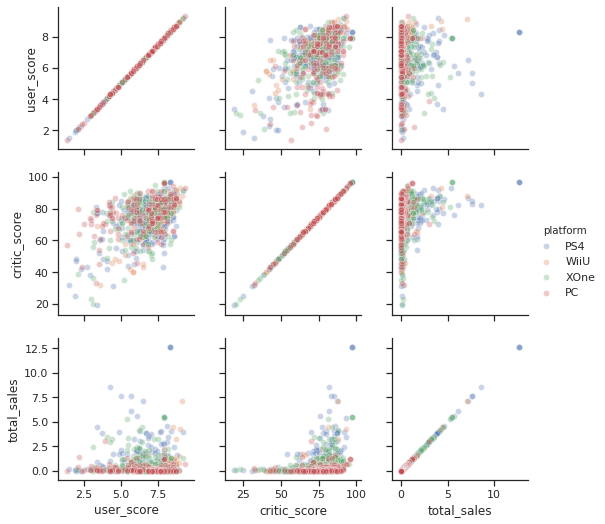

In [64]:
df_scatter = (df_platform.query('critic_score > 0')\
              [['platform', 'user_score', 'critic_score', 'total_sales', 'rating']]
             )
plt.figsize=(12,5)
g = sns.PairGrid(df_scatter, hue='platform')
g.map(sns.scatterplot, alpha=.3)
g.add_legend()
ax.set_title('Матрица диаграмм рассеяния по показателям (2013-2016гг)')

Судя по цветовым распределениям точек на графиках, данные в зависимости от платформ различаются не сильно

In [65]:
def count_coeff_corr(pl):
    return [pl, 
            df_platform[df_platform['platform'] == pl]['total_sales']
            .corr(df_platform[df_platform['platform'] == pl]['user_score']),
            df_platform[(df_platform['platform'] == pl) & (df_platform['critic_score'] > 0)]['total_sales']
            .corr(df_platform[(df_platform['platform'] == pl) & (df_platform['critic_score'] > 0)]['critic_score']),
           df_platform[df_platform['platform'] == pl]['critic_score']
            .corr(df_platform[df_platform['platform'] == pl]['user_score'])
           ]

Посчитаем коэффициенты корреляции продаж от рейтингов по платформам и корреляции отзывов критиков и пользователей

In [66]:
output = pd.DataFrame()
for pl in df_platform['platform'].unique():
    output = pd.concat([output, pd.DataFrame(count_coeff_corr(pl)).T])
output.columns = ['platform', 'corr_user_sc_sales', 'corr_critic_sc_sales', 'corr_critic_user_sc']
output.set_index('platform')

,corr_user_sc_sales,corr_critic_sc_sales,corr_critic_user_sc
platform,,,
PS4,0.01,0.42,0.38
XOne,-0.03,0.44,0.21
WiiU,0.42,0.37,0.56
PC,-0.06,0.23,0.31


Text(0, 0.5, 'Значение коэффициента корреляции')

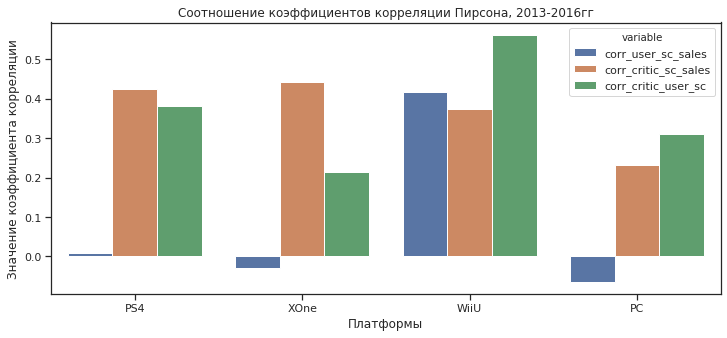

In [67]:
plt.figure(figsize=(12,5))
sns.barplot(data=output.melt(id_vars='platform'), x='platform', y='value', hue='variable')
plt.title('Соотношение коэффициентов корреляции Пирсона, 2013-2016гг')
plt.xlabel('Платформы')
plt.ylabel('Значение коэффициента корреляции')

Корреляция продаж и пользовательских оценок очень низкая и даже имеет отрицательную связь почти у всех платформ, кроме WiiU, у которой оценка пользователей имеет прямую связь с продажами и выражена на слабом уровне. Оценки критиков влияют несколько сильнее - видно прямую связь, но также нельзя сказать, что она явно выражена.

Корреляция оценок критиков и пользователей выше всего у платформы WiiU - можно говорить о средней прямой связи, а вот по остальным платформам опять же связь прямая, но слабая. 

<a id='genres'></a>
### Шаг 3.7 Анализ прибыльности жанров

Text(0, 0.5, 'Жанры')

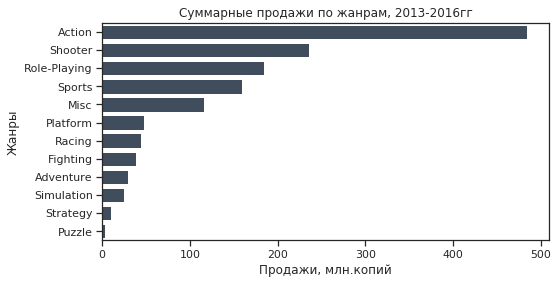

In [68]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_actual, y='genre', x='total_sales', ci=None, estimator=sum, color='#3b4d61',\
            order=df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index)
plt.title('Суммарные продажи по жанрам, 2013-2016гг')
plt.xlabel('Продажи, млн.копий')
plt.ylabel('Жанры')

Самым популярным жанром по всем продажам актуального периода и всем регионам является action, с большим отрывом обгоняющий раположенные довольно плотно друг от друга жанры шутеров, RPG и спортивных игр. Посмотрим тенденции продаж по жанрам за последние годы.

Среди наименее популярных жанров можно отметить паззлы, стратегии и симуляторы.

In [69]:
df_genres = df_actual.pivot_table(index='genre', columns='year_of_release',values='total_sales',aggfunc='sum')

Text(182.42000000000007, 0.5, 'Годы')

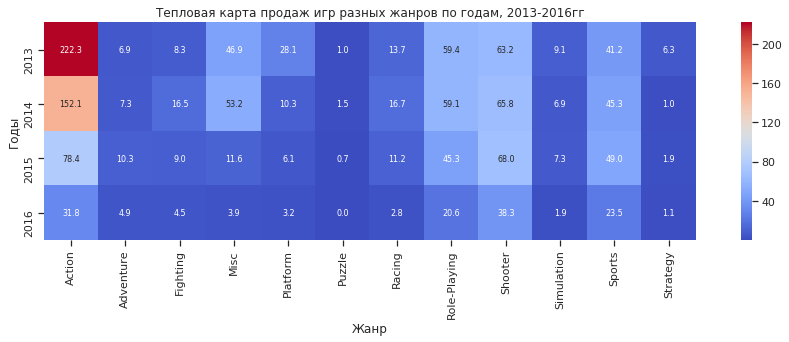

In [70]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(df_genres.T, cmap= 'coolwarm', annot=True, fmt = '.1f', square=True, annot_kws={"size":8})
plt.title("Тепловая карта продаж игр разных жанров по годам, 2013-2016гг")
plt.xlabel("Жанр")
plt.ylabel("Годы")

Динамика продаж в абсолютных величинах демонстрирует снижение выручки по наиболее популярному жанру - экшен, но при этом немного выросли продажи в нижеследующих по популярности жанрах - шутеры (с 63 млн.копий до 68 млн.копий за 3 года) и спорт (с 41 млн.копий до 49 млн.копий), жанр RPG, занимающий 3 место в топе, был стабилен в течение 2013-2014гг, но снизился в 2015г. (с 59 млн.копий до 45 млн.копий).

Посмотрим на относительные продажи по жанрам.

In [71]:
df_genres_percent = pd.DataFrame()
for col in df_genres.columns:
    df_genres_percent[str(col) + '_%'] = df_genres[col] / df_genres[col].sum()
df_genres_percent.index.names = ['year']
df_genres_percent.T

year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
2013_%,0.44,0.01,0.02,0.09,0.06,0.00,0.03,0.12,0.12,0.02,0.08,0.01
2014_%,0.35,0.02,0.04,0.12,0.02,0.00,0.04,0.14,0.15,0.02,0.10,0.00
2015_%,0.26,0.03,0.03,0.04,0.02,0.00,0.04,0.15,0.23,0.02,0.16,0.01
2016_%,0.23,0.04,0.03,0.03,0.02,0.00,0.02,0.15,0.28,0.01,0.17,0.01


Text(0, 0.5, 'Доли единицы')

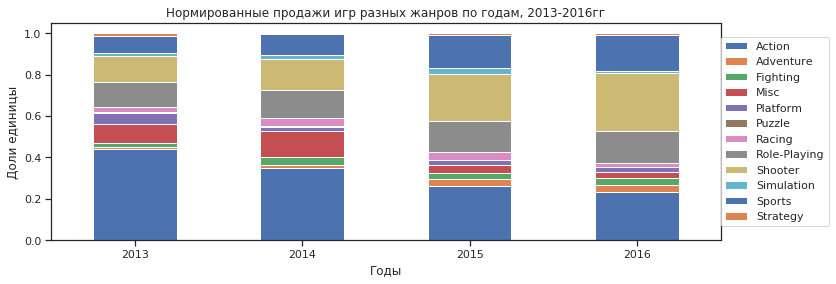

In [72]:
fig, ax = plt.subplots()
df_genres_percent.T.plot(kind='bar', stacked=True, figsize=(12,4), ax=ax)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=5, bbox_to_anchor=(1.17,0.5))
ax.set_xticklabels(['2013', '2014', '2015', '2016'], rotation=0)
plt.title("Нормированные продажи игр разных жанров по годам, 2013-2016гг")
plt.xlabel("Годы")
plt.ylabel("Доли единицы")

В относительных долях продаж наиболее отчетливо видно, как жанр action в последние годы почти в 2 раза потерял свою популярность (с 44% до 23%), на его смену приходят игры в жанрах спорт (8% -> 17%) и шутеры (12% -> 28%), RPG игры тоже немного нарастили свою долю (12% -> 15%).

<a id='analysis_conclusion'></a>
## Вывод по шагу 3

В представленных данных были обнаружены некорректные данные - продажи игр для приставок ранее даты выхода самой консоли (DS).

Анализ выпуска игр в целом по рынку показал, что пик приходился на 2008г, после которого число игр ежегодно уменьшается, текущий уровень игр составляет в среднем 700 в год. Вероятнее всего на тенденцию снижения повлияло широкое распространение мобильных игр, которые забрали существенную долю рынка от игр на консолях.

Средняя длина жизни платформы составляет 10 лет, пик продаж приходится примерно на 5 год существования. Исходя из этого был выбран период для анализа **с 2013 по 2016гг.**, в рамках которого наиболее перспективными платформами были выбраны **XOne** и **PS4**. Эти платформы показыват наибольшие средние значения (0,64 и 0,82 млн.копий соответственно), но также имеют довольно значительный разброс значений и могут быть менее предсказуемы при продвижении.

**PC** не входит в топ последних лет по продажам, но является привлекательной с точки зрения своей стабильности (показатель дисперсии среди выбранных платформ у PC минимален).

Также была выделена платформа **WiiU**, которая может быть довольно перспективным вариантом в силу своей новизны, опираясь на опыт запуска первых платформ данной серии, что мы видели на графике топ-5 успешных платформ.

Пользователи и критики часто по-разному оценивают одни и те же игры (это видно по платформам 'PS4', 'XOne' и 'PC'), а покупатели игр все же больше ориентируются на оценки критиков, нежели пользователей, но все же в силу невысокой корреляции нельзя сказать, что игры с высокими оценками критиков обязательно имеют большие продажи. Платформа WiiU стоит особняком, здесь рейтинги юзеров и критиков совпадают сильнее, чем на других рассмотренных платформах, но все равно это не является определяющим фактором в продажах той или иной игры.

Самым популярным жанром по всем продажам актуального периода и всем регионам является **экшен**, хотя продажи по данному жанру с каждым годом снижаются. Со значительным отрывом от лидера довольно плотно друг от друга следуют жанры **шутеров, RPG и спортивных игр**. Абсолютные продажи по ним показывают положительную динамику на протяении последних лет. Данный эффект еще нагляднее демонстриируют относительные показатели - отчетливо видно, как жанр экшен в последние годы почти в 2 раза потерял свою популярность (с 44% до 23%), на его смену приходят игры в жанрах спорт (8% -> 17%), шутеры (12% -> 28%) и RPG (12% -> 15%).

Среди наименее популярных жанров можно отметить паззлы, стратегии и симуляторы.

<a id='regions'></a>
## Шаг 4. Составление портрета пользователя каждого региона

In [73]:
titles = {'rating': 'возрастному рейтингу', 'platform' : 'платформам', 'genre' : 'жанрам', 'na_sales' : 'США',\
         'eu_sales' : 'Европе', 'jp_sales' : 'Японии'}
def drow_sales_pl(arg, col):
    df = df_actual.pivot_table(index='year_of_release', columns=col, values=arg, aggfunc='sum')
    fig = plt.figure(figsize=(14,4))
    ax1 = plt.subplot(1, 2, 1)
    ax = sns.heatmap(df, cmap= 'coolwarm', annot=True, fmt = '.1f', square=True, annot_kws={"size":7},cbar=False)
    plt.title("Продажи игр в {} по {} по годам".format(titles.get(arg), titles.get(col)))
    plt.xlabel('Разбивка по {}'.format(titles.get(col)))
    plt.ylabel("Годы")
    ax2 = plt.subplot(1, 2, 2)
    df_actual.groupby(col)[arg].sum().sort_values(ascending=False).head().plot(kind='bar', color='#3b4d61')
    plt.title("Продажи игр в {} по {}, 2013-2016гг".format(titles.get(arg), titles.get(col)))
    plt.xlabel('Разбивка по {}'.format(titles.get(col)))
    plt.ylabel('Продажи, млн.копий')

In [74]:
def rating(arg):
    df_new = pd.DataFrame()
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        df_new['top_pl_' + str(region.split('_')[0])] = (df_actual
                .pivot_table(index='year_of_release', columns=arg, values=region, aggfunc='sum').
                sum().
                sort_values(ascending=False).head().index)
    return df_new

Рассмотрим продажи по регионам в разбивке по возрастным рейтингам без учета неопределенных, выводы по доле игр с неопределенным возрастным рейтингом делались ранее, на шаге 1.4

In [75]:
df_region_pl =  rating('platform')
df_region_genres = rating('genre')

In [76]:
ESRB = (df_actual.groupby('rating')
        .agg({'na_sales' : 'sum', 'eu_sales' : 'sum', 'jp_sales' : 'sum', 'other_sales' : 'sum'})
        .loc['E' : 'T']
       )
ESRB

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,86.23,88.05,16.83,24.08
E10+,62.53,48.42,6.61,14.78
M,246.96,227.66,20.20,74.44
T,57.98,49.52,29.33,16.73


In [77]:
df_ESRB_percent = pd.DataFrame()
for col in ESRB.columns:
    df_ESRB_percent[str(col) + '_%'] = ESRB[col] / ESRB[col].sum()

Text(0, 0.5, 'Доли единицы')

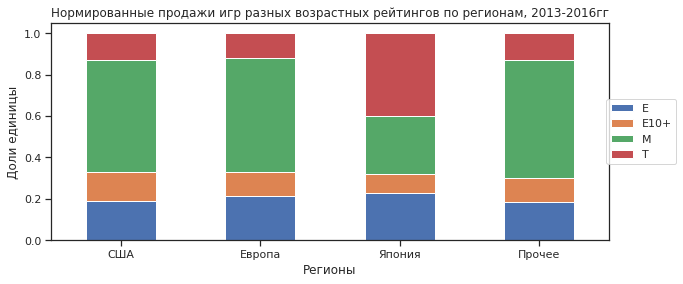

In [78]:
fig, ax = plt.subplots()
df_ESRB_percent.T.plot(kind='bar', stacked=True, figsize=(10,4), ax=ax)
plt.xticks(rotation=0)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=5, bbox_to_anchor=(1.13, 0.5))
ax.set_xticklabels(['США', 'Европа', 'Япония', 'Прочее'])
plt.title("Нормированные продажи игр разных возрастных рейтингов по регионам, 2013-2016гг")
plt.xlabel("Регионы")
plt.ylabel("Доли единицы")

Исходя из нормированных продаж, все регионы довольно похожи, кроме Японии. Хотя, если оценивать суммарно контент для взрослой и тинейджерской аудитории (М + Т), то видно, что относительные объемы сопоставимы по регионам и занимают бОльшую часть всех продаж.

Рассмотрим более подробно показатели по каждому из регионов

<a id='NA'></a>
### Шаг 4.1 Анализ по региону США

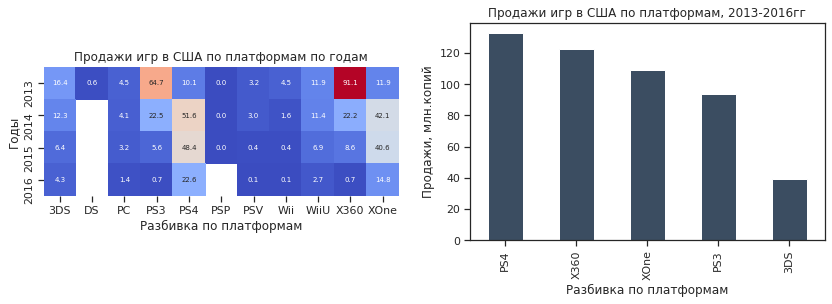

In [79]:
drow_sales_pl('na_sales', 'platform')

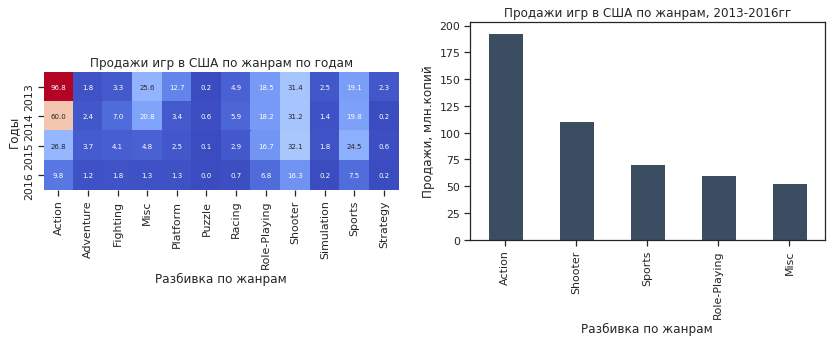

In [80]:
drow_sales_pl('na_sales', 'genre')

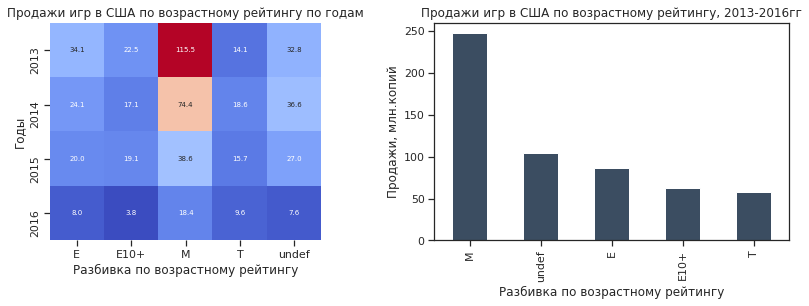

In [81]:
drow_sales_pl('na_sales', 'rating')

<a id='EU'></a>
### Шаг 4.2 Анализ по региону Европа

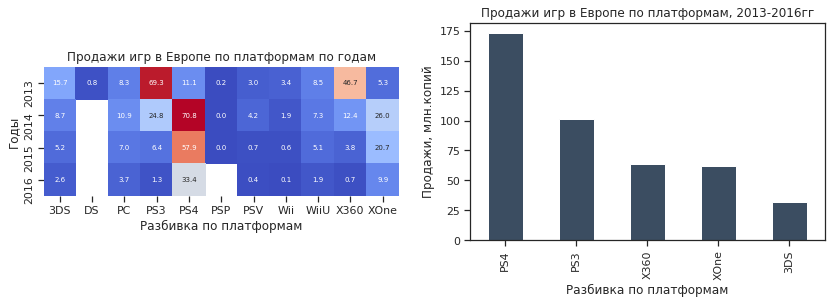

In [82]:
drow_sales_pl('eu_sales', 'platform')

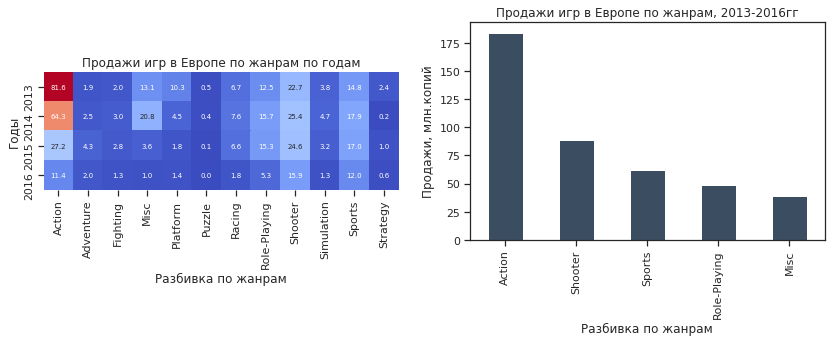

In [83]:
drow_sales_pl('eu_sales', 'genre')

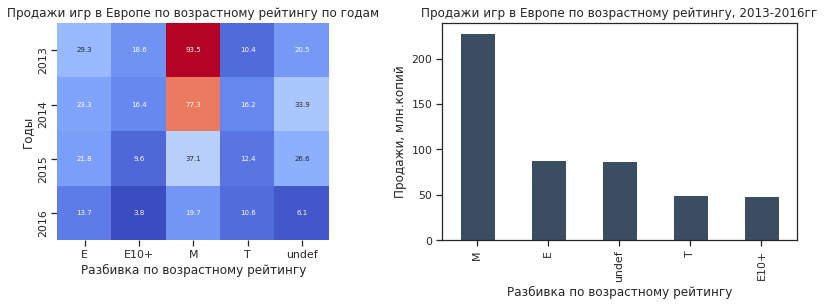

In [84]:
drow_sales_pl('eu_sales', 'rating')

<a id='JP'></a>
### Шаг 4.3 Анализ по региону Япония

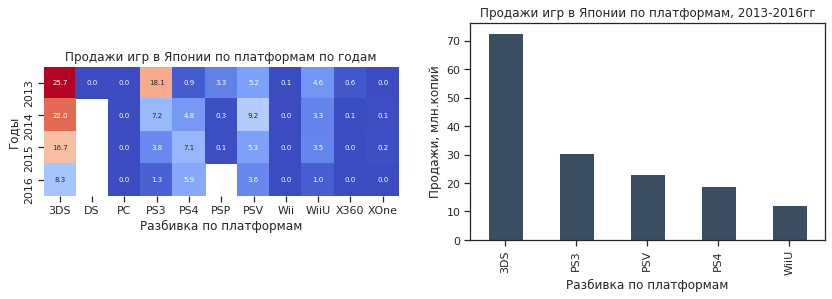

In [85]:
drow_sales_pl('jp_sales', 'platform')

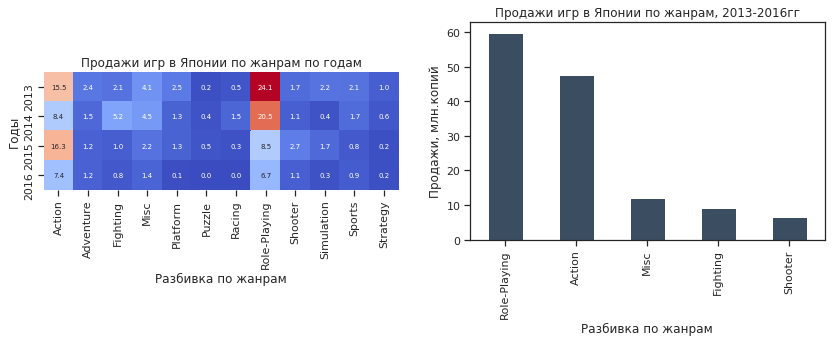

In [86]:
drow_sales_pl('jp_sales', 'genre')

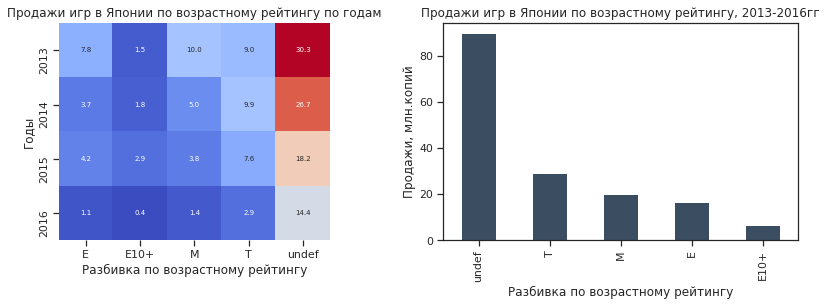

In [87]:
drow_sales_pl('jp_sales', 'rating')

<a id='regions_conclusion'></a>
## Вывод по шагу 4

Пользователи в США и Европе имеют довольно схожие предпочтения в консолях, жанрах и даже рейтингах, что нельзя сказать о регионе "Япония", который имеет свои специфики.

In [88]:
df_region_pl

,top_pl_na,top_pl_eu,top_pl_jp
0,PS4,PS4,3DS
1,X360,PS3,PS3
2,XOne,X360,PSV
3,PS3,XOne,PS4
4,3DS,3DS,WiiU


В Европе и США лидирующие позиции по продажам за период с 2012 по 2016 гг. занимают игры платформы PS4 (причем в Европе это лидерство явное, а в США первые 4 места идут довольно плотно друг за другом), в Японии же игры этой платформы находятся на 4 позиции. При этом самыми продаваемыми в Японии являются игры платформы 3DS с большим отрывом от остальных претендентов, а в Европе и США эта платформа заняла лишь 5 место по объему продаж. Остальные 3 места со 2 по 4 в Европе и США разделили игры платформ X360, XOne и PS3, в Японии же ни одна из консолей семейства XBox не попала в рейтинг. 

Суммируя, можно заключить, что в США и Европе игроки в основном разделены на 2 "клана" - те, кто предпочитает консоли семейства PlayStation и те, кто играет на консолях семейства XBox, при этом в Европейской части все же большее предпочтение отдается PS. В Японии же в основном предпочитают "местные" консоли - Nintendo (DS), PlayStation и Wii, но Nintendo является безоговорочным фаворитом.

In [89]:
df_region_genres

,top_pl_na,top_pl_eu,top_pl_jp
0,Action,Action,Role-Playing
1,Shooter,Shooter,Action
2,Sports,Sports,Misc
3,Role-Playing,Role-Playing,Fighting
4,Misc,Misc,Shooter


В Европе и США вкусы по жанрам аболютно схожи - наибольшая популярность принадлежит играм жанра экшен, продажи которых в целом за период  почти в 2 раза превышают продажи следующего в рейтинге жанра - шутеров. 3 и 4 места занимают игры жанров спорт и RPG, продажи по ним не сильно отличаются, но зато стабильно имеют свою долю на рынке год от года. Последний в рейтинге жанр Misc по сути не является жанром как таковым, собирая в себя игры, которые не были определены ни к одному поименованному жанру.

В Японии же картина опять противоположна - здесь самыми популярными являются RPG игры, правда экшены тоже довольно популярны, причем к концу анализируемого периода именно они набирают позиции, в отличие от RPG. Остальные жанры сильно отстают от двух лидеров, и здесь также присутсвуют не отнесенные к другим жанрам игры и игры-шутеры, но вот игры жанра файтинг есть в топе лидеров жанров только в азиатском регионе, скорее всего это связано с консолями, на которых предпочитают играть игроки данного региона.

In [90]:
df_ESRB_percent

,na_sales_%,eu_sales_%,jp_sales_%,other_sales_%
rating,,,,
E,0.19,0.21,0.23,0.19
E10+,0.14,0.12,0.09,0.11
M,0.54,0.55,0.28,0.57
T,0.13,0.12,0.40,0.13


В возрастных рейтингах опять же пользователи из США и Европы довольно схожи, и также сильно отличаются от игроков из Японии. Как уже отмечалось ранее, в Японии больше половины игр не имеют возрастного рейтинга, проставляемого американской организацией ESRB, в США и Европе таких игр 25-28% от всех продаж. 

В Европе и США почти половину всех продаж занимают игры с рейтингом М - "Для взрослых" (около 55% без учета неопределенных), в Японии же доля таких игр от всех продаж почти в 2 раза меньше и составляет 28%.

С разницей в 3.5 раза игры для тинейджеров (Т) занимают более высокую долю в Азии (40% без учета неопределенных), чем в Европе и США (12% и 13% соответственно).

Игры рейтинга Е "Для всех" без учета неопределенных сопоставимы по продажам во всех трех регионах, немного больше в Японии (около 20%).

А игры с рейтингом E10+ "От 10 лет и старше" занимают 9-14% доли продаж игр с возрастными рейтингами, наименьшая доля из регионов наблюдается в Японии.

Таким образом, ориентируясь на возрастные рейтинги, в Европе и США в основном потребителями контента являются взрослые люди, тогда как в Японии наиболее объемной является доля тинейджеров, а взрослые пользователи занимают второе место в этой градации.

<a id='tests'></a>
## Шаг 5. Проверка гипотез

Определим функцию для проведения проверки гипотез. Зададим параметр равенства дисперсий, равным False, т.к. как дисперсии по платформам отличаются между собой ~в 1.5 раза, а дисперсии продаж по жанрам Action и Sports отличаются друг от друга почти в 2 раза:

In [91]:
print("Дисперсия оценок платформы XOne {:.5}"
      .format(np.var(df_actual[df_actual['platform'] == 'XOne'])['user_score'], 2))
print("Дисперсия оценок платформы PC {:.5}"
      .format(np.var(df_actual[df_actual['platform'] == 'PC'])['user_score'], 2))

Дисперсия оценок платформы XOne 1.873
Дисперсия оценок платформы PC 2.9553


In [92]:
print("Дисперсия оценок жанра Action {:.5}"
      .format(np.var(df_actual[df_actual['genre'] == 'Action'])['user_score'], 2))
print("Дисперсия оценок жанра Sports {:.5}"
      .format(np.var(df_actual[df_actual['genre'] == 'Sports'])['user_score'], 2))

Дисперсия оценок жанра Action 1.6204
Дисперсия оценок жанра Sports 3.1191


In [93]:
def t_testing(arg, ar, alpha):
    results = st.ttest_ind(df_actual[df_actual[arg] == ar[0]]['user_score'],\
                       df_actual[df_actual[arg] == ar[1]]['user_score'], equal_var=False)
    print('p-значение: ', round(results.pvalue, 5))
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [94]:
df_actual['user_score'] = df_actual['user_score'].fillna(0)

<a id='tests_platforms'></a>
### Шаг 5.1 Различия в пользовательских рейтингах платформ Xbox One и PC

Для сопоставления данных о неравенстве средних двух совокупностей сформулируем гипотезы - нулевая гипотеза предполагает, что значения не различаются, альтернативная, напротив, утверждает, что значения различны.

H0: Средний пользовательский рейтинг платформы Xbox One = среднему пользовательскому рейтингу платформы PC    
H1: Средний пользовательский рейтинг платформы Xbox One <> среднему пользовательскому рейтингу платформы PC

При небольшом объеме выборки, как в нашем случае, получить значимое различие в выборках более вероятно, поэтому для проведения статистического анализа выберем стандартный уровень значимости в размере 5%.

In [95]:
t_testing('platform', ['XOne', 'PC'], .05)

p-значение:  0.00664
Отвергаем нулевую гипотезу


Полученное значение p-value после проведенного одностороннего t-теста говорит о том, что с очень малой вероятностью, стремящейся к 0, найденное различие в пользовательских рейтингах можно получить случайно, таким образом, выбранный критерий значимости не был превышен, можем отвергнуть нулевую гипотезу и сделать вывод о значимом различии между средними пользовательскими рейтингами платформы XOne и платформы PC по данным выборки.

<a id='tests_genres'></a>
### Шаг 5.2 Различия в пользовательских рейтингах жанров Action и Sports

H0: Средний пользовательский рейтинг жанра Action = среднему пользовательскому рейтингу жанра Sports    
H1: Средний пользовательский рейтинг жанра Action <> среднему пользовательскому рейтингу жанра Sports

In [96]:
t_testing('genre', ['Action', 'Sports'], .05)

p-значение:  0.08534
Не получилось отвергнуть нулевую гипотезу


Полученные по выборке данные о средних пользовательских рейтингах по жанрам Action и Sports не противоречат нулевой гипотезе, с учетом выбранного критерия значимости разница в средних рейтингах жанра экшен и спортивных играх статистически не была подтверждена.

<a id='tests_conclusion'></a>
## Вывод по шагу 5

Для выбранного критерия значимости на уровне 5% проведенный тест позволил отбросить нулевую гипотезу и сделать вывод о значимом различии между средними рейтингами пользователей от разных платформ по данным выборки (XOne и PC). 

А вот данные по средними рейтингами пользователей в зависимости от жанра (Action и Sports) не получили статистического подтверждения с учетом выбранного уровня значимости, нулевая гипотеза не была отвергнута.

<a id='total_conclusion'></a>
## Общий вывод

**Рынок консольных и PC игр находится в стагнации**, начиная с 2008 г. число игр и их продажи ежегодно уменьшаются. Изначально тенденция была вызвана, скорее всего, общей неблагоприятной экономической ситуацией, в первую очередь за счет роста курса доллара и цен на игоровое оборудование, например, на консоли нового поколения. Начиная примерно с 2011г наложился еще один тренд, который не позволил игровому рынку восстановиться до прежнего докризисного уровня - это широкое распространение мобильных онлайн-игр и игр в социальных сетях, которые забрали существенную долю рынка от игр на консолях и PC. Текущий уровень выпущенных игр на рынке составляет в среднем 700 в год. При этом **новое поколение платформ выходит в среднем каждые 10 лет, а пик продаж достигается примерно к 5 году существования**. 

Для пользователей **США и Европы** в первую очередь привлекательными являются консоли **Xbox и Sony**, игры данных платформ наиболее потенциально прибыльны на данных территориях, при этом в Европейской части все же большее предпочтение отдается PS, а **в  Японии** в основном предпочтение отдается **местным консолям - Nintendo (DS), PlayStation и Wii**, но Nintendo является безоговорочным фаворитом.

Порядка 65% игр на японском рынке не имеют отзывов критиков и пользователей, а также возрастных рейтингов, проставляемых американской рейтинговой ассоциацией. Необходимо обращать внимание на данную особенность региона, и по возможности учитывать рейтиги, проставляемые организаций, действующей на данной территории. В Европе и США почти половину всех продаж занимают игры с рейтингом М - "Для взрослых" (55%), в Японии же доля таких игр почти в 2 раза меньше, но в Японии довольно большая доля тинейджерского контента (40%), тогда как в Европе и США это всего лишь 12-13% от всех продаж с проставленным возрастным рейтингом. Суммарно же эти 2 категории занимают в любом из рассмотренных регионов около 70%, на эти две возрастные группы стоит делать прицел.

**Самым популярным жанром** по всем продажам актуального периода и всем регионам является **экшен**, хотя продажи по данному жанру с каждым годом снижаются. Со значительным отрывом от лидера довольно плотно друг от друга следуют жанры **шутеров, RPG и спортивных игр**. Европа и США в целом разделяют общие предпочтения - наибольшая популярность здесь у жанра экшен, продажи которых почти в 2 раза превышают продажи следующего в рейтинге жанра - шутеров. 3 и 4 места занимают игры жанров спорт и RPG, продажи по ним не сильно отличаются, но зато стабильно имеют свою долю на рынке год от года. **В Японии самыми популярными являются RPG игры**, но игры жанра экшен набирают популярность и усиливают позиции в последние годы, в отличие от RPG. Также в качестве специфики региона отметим наличие в топе лидеров жанра файтинг, скорее всего это связано с контентом для консолей, на которых предпочитают играть игроки азиатского региона.

**Наиболее перспективными платформами на 2017г. могут стать XOne и PS4**, как уже было отмечено в США и Европе консоли Xbox и Sony являются несомненными фаворитами на рынке и игроки в основном разделены именно на эти 2 "клана", но следует учитывать, что в Японии ни одна из консолей семейства XBox не попала в рейтинг топовых платформ. В целом платформы XOne и PS4 показывают наибольшие продажи и позитивную динамику, которая если и не продолжится в 2017г, то, вероятнее всего, покажет такой уровень продаж, который будет как минимум не ниже, чем по какой-либо другой выбранной платформе. Стоит отметить, что хотя данные платформы и имеют высокий средний уровень продаж, также они выделяются сильной волатильностью и довольно значительным разбросом значений, т.е. могут быть менее предсказуемы при продвижении.

**PC** не входит в топ последних лет по продажам, но является привлекательным вариантом с точки зрения своей стабильности (показатель дисперсии среди выбранных платформ у PC минимален) и наличием большого количества лояльных приверженцев, в течение многих лет отдающих предпочтение играм на компьютере, радуясь, что нет необходимости покупать обновленную версию консоли каждые несколько лет, в отличие от приставок. Поэтому PC хоть и имеет сравнительно небольшие средние и медианные показатели продаж, зато отличается большей стабильностью и меньшей волатильностью, и, значит, ведет себя более предсказуемо при продвижении.

Также была выделена платформа **WiiU**, которая может быть довольно перспективным вариантом на рынке Японии, опыт запуска первых платформ данной серии показал, что на пике продаж игры данной консоли могут показывать хороший результат, а WiiU появилась как раз 5 лет назад и может показать пиковый рост в прогнозируемом периоде. Как уже было отмечено, для Японии фаворитом в платформах является семейство Nintendo, но в анализируемый период продажи платформы 3DS показывали стагнацию на протяжении 3 лет, что не дает с полным правом рекомендовать эту консоль как потенциально прибыльную даже на рынке Японии.

Пользователи и критики часто по-разному оценивают одни и те же игры (это видно по платформам 'PS4', 'XOne' и 'PC'), а покупатели игр все же больше ориентируются на оценки критиков, нежели пользователей, но все же в силу невысокой корреляции нельзя сказать, что игры с высокими оценками критиков обязательно имеют большие продажи. Платформа WiiU стоит особняком, здесь рейтинги юзеров и критиков совпадают сильнее, чем на других рассмотренных платформах, но все равно это не является определяющим фактором в продажах той или иной игры. Сравнивая средние рейтинги пользователей по платформам XOne и PC был сделан вывод о их значимом различии для выбранного критерия значимости на уровне 5%, а вот данные по средним рейтингам пользователей в зависимости от жанра (Action и Sports) не получили статистического подтверждения с учетом выбранного уровня значимости.

В целом несмотря на растущую популярность мобильных игр рынок консольных игр еще довольно крепко стоит на ногах и в перспективе нет ощущения, что мобильные игры могут полностью заменить консольные или PC игры. Но вероятнее всего видимые сейчас тенденции приведут к тому, что покупателями на рынке консольных игр останутся преимущественно пользователи, для которых ценен именно такой способ игры - со специальным оборудованием, большим монитором или телевизором. И именно данная аудитория в силу своей лояльности будет, скорее всего, поддерживать развитие сегмента и увеличивать показатель средних продаж в расчете на пользователя, поэтому здесь будет рекомендоваться продвижение не "вширь", а более глубокая работа с лояльностью и удержанием текущих покупателей.